In [2]:
# imports
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
# descriptive statistics
df = pd.read_csv('Data/monthly/data.csv')
df.columns = df.columns.str.strip()  # Strip whitespace from column names


df_ds = df.describe()
df_ds = df_ds.transpose()
df_ds

,count,mean,std,min,25%,50%,75%,max
Absatzzahlen,60.0,1.671455e+04,2894.585199,1.034600e+04,1.453700e+04,1.644050e+04,1.925550e+04,2.293700e+04
BMW Finanzierung,60.0,5.949000e+01,9.782182,4.240000e+01,5.193750e+01,5.892500e+01,6.610000e+01,8.400000e+01
BMW Leasing,60.0,6.279250e+01,11.141748,4.125000e+01,5.395000e+01,6.200000e+01,7.176250e+01,8.600000e+01
Auto Finanzierung,60.0,6.728833e+01,12.040329,4.000000e+01,5.962500e+01,6.550000e+01,7.670000e+01,9.375000e+01
Auto Leasing,60.0,4.812000e+01,8.392653,2.720000e+01,4.525000e+01,4.735000e+01,5.262500e+01,7.600000e+01
Gebrauchtwagenindex,60.0,1.418933e+02,15.463855,1.147000e+02,1.297500e+02,1.401500e+02,1.510000e+02,1.716000e+02
EURIBOR 3M,60.0,1.273870e+00,1.930329,-5.820000e-01,-5.235500e-01,-1.013000e-01,3.459250e+00,3.971600e+00
Geschäftsklima,60.0,9.050833e+01,5.249448,7.500000e+01,8.660000e+01,8.965000e+01,9.320000e+01,1.010000e+02
Geschäftslage,60.0,9.224667e+01,5.730485,7.860000e+01,8.827500e+01,9.310000e+01,9.722500e+01,1.017000e+02
Geschäftserwartungen,60.0,8.895500e+01,6.799263,7.100000e+01,8.435000e+01,8.740000e+01,9.460000e+01,1.022000e+02


In [12]:
# seasonal adjustment

from statsmodels.tsa.seasonal import STL

# List of columns to be seasonally adjusted
seasonal_cols = [
  'Absatzzahlen', 'BMW Finanzierung', 'BMW Leasing', 'Auto Finanzierung', 'Auto Leasing',
  'Geschäftsklima', 'Geschäftslage', 'Geschäftserwartungen', 'Verbraucherpreisindex',
  'Arbeitslosenquote', 'Bestand Arbeitslose', 'Zugang Arbeitslose', 'Abgang Arbeitslose'
]

df_sa = df.copy()
df_sa['DATE'] = pd.to_datetime(df_sa['DATE'])
df_sa = df_sa.set_index('DATE')

for col in seasonal_cols:
  stl = STL(df_sa[col], period=12, robust=True)
  res = stl.fit()
  df_sa[col] = res.trend + res.resid  # seasonally adjusted

df_sa = df_sa.reset_index()

df_sa

,DATE,Absatzzahlen,BMW Finanzierung,BMW Leasing,Auto Finanzierung,Auto Leasing,Gebrauchtwagenindex,EURIBOR 3M,Geschäftsklima,Geschäftslage,...,Zugang Arbeitslose,Abgang Arbeitslose,tavg,tmin,tmax,prcp,wdir,wspd,wpgt,pres
0,2020-01-31,20197.056055,67.643871,81.596561,61.358966,34.170965,118.6,-0.3911,98.267185,103.826453,...,568735.099659,524308.088261,4.561290,-2.7,13.4,49.0,229.774194,15.341935,59.3,1021.090323
1,2020-02-29,19996.253807,63.831304,79.003916,63.371881,37.399108,119.5,-0.4089,85.437142,80.246985,...,585792.895041,517012.825158,6.282759,0.8,14.4,89.2,241.896552,19.841379,77.8,1009.951724
2,2020-03-31,20037.985951,62.868894,46.441574,59.629593,34.745923,119.4,-0.4166,85.249613,95.147574,...,587399.801317,509569.133724,5.719355,-4.0,16.8,47.6,206.096774,15.345161,79.6,1017.764516
3,2020-04-30,19640.703601,66.051952,77.737069,60.229097,34.903892,116.1,-0.2541,86.375177,82.241084,...,583905.870812,498685.856264,10.700000,-2.0,23.0,7.7,202.033333,13.520000,50.0,1018.456667
4,2020-05-31,8489.754848,62.523694,79.622751,61.569152,38.912760,114.7,-0.2720,87.149813,83.296517,...,542199.566571,495945.915068,12.293548,0.6,24.1,26.9,233.838710,13.419355,46.3,1019.329032
5,2020-06-30,19631.433705,63.658155,76.838510,59.269915,39.968844,116.0,-0.3760,88.050757,84.849025,...,519170.664768,494023.972901,18.760000,9.0,29.8,53.3,168.500000,12.653333,50.0,1012.686667
6,2020-07-31,19515.601434,58.670709,76.381685,59.419881,40.761096,120.5,-0.4441,88.863557,85.917119,...,511641.028724,495479.334094,17.987097,9.8,28.3,46.7,252.322581,12.058065,59.3,1015.345161
7,2020-08-31,18811.107759,60.028149,74.502541,57.644269,39.915919,124.1,-0.4797,89.869731,87.249971,...,510236.995637,492419.706227,21.154839,11.4,34.6,37.5,180.709677,11.896774,66.7,1013.280645
8,2020-09-30,19636.144051,59.873327,74.045313,59.607731,42.043805,126.4,-0.4914,89.288746,88.691963,...,496382.109076,477452.326103,15.420000,5.9,30.3,44.8,204.166667,10.916667,50.0,1016.486667
9,2020-10-31,19115.791937,61.490814,73.356609,55.226831,42.835956,127.2,-0.5091,90.269909,89.973420,...,519446.174981,498991.402665,11.112903,3.8,21.7,70.0,191.129032,13.651613,53.7,1011.454839


In [28]:
# feature engineering
df_fe = df_sa.copy()
df_fe["DATE"] = pd.to_datetime(df_fe["DATE"])

# Create lagged features
# Create lagged features and insert them after 'Absatzzahlen'
absatz_idx = df_fe.columns.get_loc('Absatzzahlen')
for lag in range(1, 18):
  col_name = f'Absatzzahlen_t{lag}'
  df_fe.insert(absatz_idx + lag, col_name, df_fe['Absatzzahlen'].shift(lag))

df_fe

,DATE,Absatzzahlen,Absatzzahlen_t1,Absatzzahlen_t2,Absatzzahlen_t3,Absatzzahlen_t4,Absatzzahlen_t5,Absatzzahlen_t6,Absatzzahlen_t7,Absatzzahlen_t8,...,Zugang Arbeitslose,Abgang Arbeitslose,tavg,tmin,tmax,prcp,wdir,wspd,wpgt,pres
0,2020-01-31,20197.056055,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,568735.099659,524308.088261,4.561290,-2.7,13.4,49.0,229.774194,15.341935,59.3,1021.090323
1,2020-02-29,19996.253807,20197.056055,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,585792.895041,517012.825158,6.282759,0.8,14.4,89.2,241.896552,19.841379,77.8,1009.951724
2,2020-03-31,20037.985951,19996.253807,20197.056055,NaN,NaN,NaN,NaN,NaN,NaN,...,587399.801317,509569.133724,5.719355,-4.0,16.8,47.6,206.096774,15.345161,79.6,1017.764516
3,2020-04-30,19640.703601,20037.985951,19996.253807,20197.056055,NaN,NaN,NaN,NaN,NaN,...,583905.870812,498685.856264,10.700000,-2.0,23.0,7.7,202.033333,13.520000,50.0,1018.456667
4,2020-05-31,8489.754848,19640.703601,20037.985951,19996.253807,20197.056055,NaN,NaN,NaN,NaN,...,542199.566571,495945.915068,12.293548,0.6,24.1,26.9,233.838710,13.419355,46.3,1019.329032
5,2020-06-30,19631.433705,8489.754848,19640.703601,20037.985951,19996.253807,20197.056055,NaN,NaN,NaN,...,519170.664768,494023.972901,18.760000,9.0,29.8,53.3,168.500000,12.653333,50.0,1012.686667
6,2020-07-31,19515.601434,19631.433705,8489.754848,19640.703601,20037.985951,19996.253807,20197.056055,NaN,NaN,...,511641.028724,495479.334094,17.987097,9.8,28.3,46.7,252.322581,12.058065,59.3,1015.345161
7,2020-08-31,18811.107759,19515.601434,19631.433705,8489.754848,19640.703601,20037.985951,19996.253807,20197.056055,NaN,...,510236.995637,492419.706227,21.154839,11.4,34.6,37.5,180.709677,11.896774,66.7,1013.280645
8,2020-09-30,19636.144051,18811.107759,19515.601434,19631.433705,8489.754848,19640.703601,20037.985951,19996.253807,20197.056055,...,496382.109076,477452.326103,15.420000,5.9,30.3,44.8,204.166667,10.916667,50.0,1016.486667
9,2020-10-31,19115.791937,19636.144051,18811.107759,19515.601434,19631.433705,8489.754848,19640.703601,20037.985951,19996.253807,...,519446.174981,498991.402665,11.112903,3.8,21.7,70.0,191.129032,13.651613,53.7,1011.454839


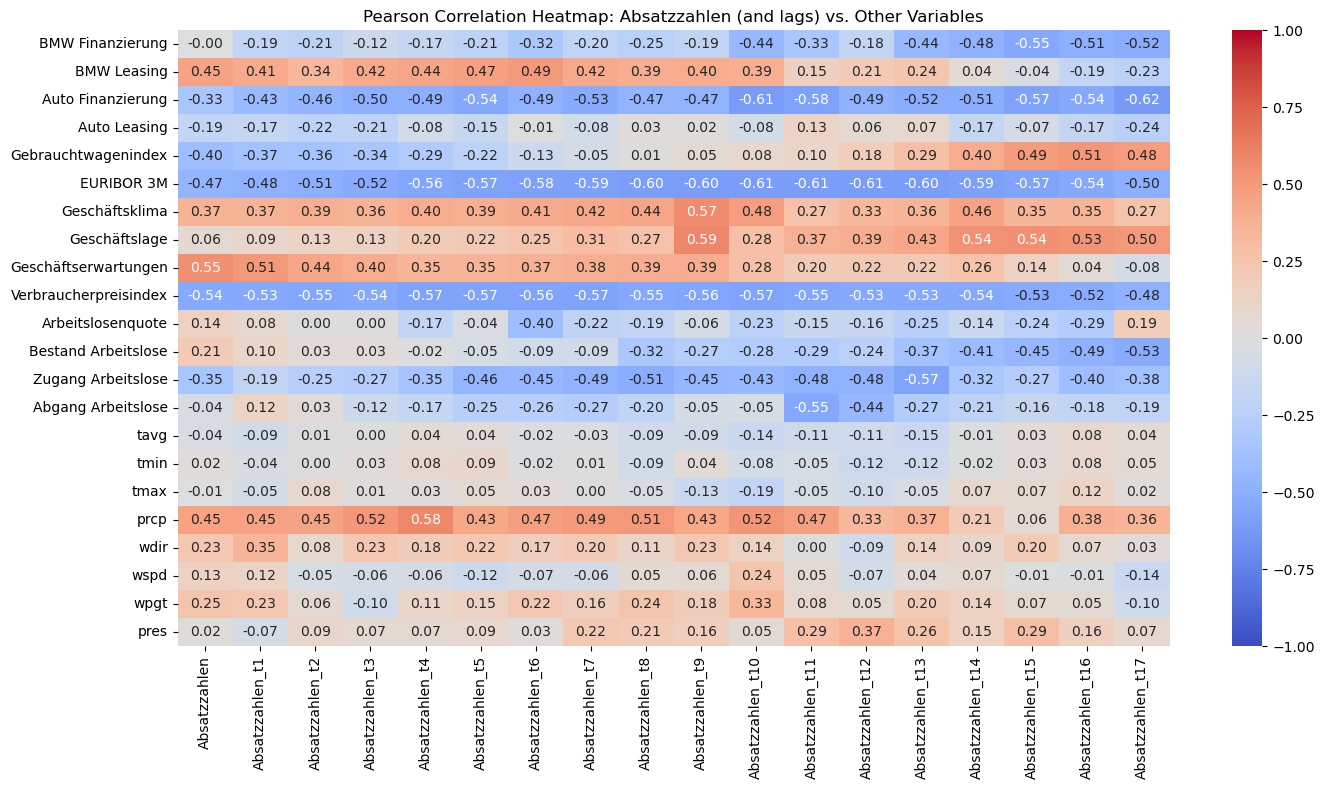


Pearson Correlation Subset:


,Absatzzahlen,Absatzzahlen_t1,Absatzzahlen_t2,Absatzzahlen_t3,Absatzzahlen_t4,Absatzzahlen_t5,Absatzzahlen_t6,Absatzzahlen_t7,Absatzzahlen_t8,Absatzzahlen_t9,Absatzzahlen_t10,Absatzzahlen_t11,Absatzzahlen_t12,Absatzzahlen_t13,Absatzzahlen_t14,Absatzzahlen_t15,Absatzzahlen_t16,Absatzzahlen_t17
BMW Finanzierung,-0.004718,-0.187384,-0.211954,-0.123330,-0.171410,-0.214709,-0.320964,-0.201443,-0.248883,-0.190640,-0.441404,-0.328216,-0.181449,-0.441835,-0.478761,-0.545430,-0.506676,-0.515732
BMW Leasing,0.448351,0.412274,0.342158,0.419217,0.440918,0.467339,0.494090,0.417480,0.391267,0.402448,0.389164,0.149323,0.207324,0.239349,0.040348,-0.037733,-0.185604,-0.229319
Auto Finanzierung,-0.328161,-0.428761,-0.461668,-0.495703,-0.492571,-0.542120,-0.488031,-0.529547,-0.472199,-0.474067,-0.614989,-0.578410,-0.490984,-0.521090,-0.512351,-0.574756,-0.538247,-0.621697
Auto Leasing,-0.185454,-0.171389,-0.224752,-0.209476,-0.082277,-0.149616,-0.006611,-0.083698,0.028543,0.016411,-0.084587,0.131199,0.057759,0.071013,-0.166692,-0.069828,-0.174304,-0.237816
Gebrauchtwagenindex,-0.404541,-0.373642,-0.363521,-0.343602,-0.289240,-0.219281,-0.131184,-0.054862,0.013818,0.049140,0.081842,0.102384,0.180729,0.288579,0.399802,0.485546,0.514507,0.479925
EURIBOR 3M,-0.465505,-0.484119,-0.507739,-0.523940,-0.559164,-0.570984,-0.580649,-0.589171,-0.595641,-0.601882,-0.606759,-0.608420,-0.607650,-0.603025,-0.589646,-0.569169,-0.538972,-0.495853
Geschäftsklima,0.366019,0.365349,0.388803,0.363292,0.400103,0.388184,0.412815,0.422073,0.440990,0.566178,0.477277,0.272646,0.328770,0.357811,0.459183,0.348930,0.354384,0.265424
Geschäftslage,0.059941,0.090617,0.129920,0.132845,0.198468,0.216657,0.250466,0.309893,0.267973,0.589250,0.284575,0.371464,0.391544,0.430110,0.538606,0.544340,0.528739,0.503807
Geschäftserwartungen,0.552453,0.505785,0.436562,0.403720,0.350430,0.351835,0.370022,0.384997,0.394160,0.394854,0.278216,0.199160,0.216046,0.218237,0.262198,0.140452,0.043246,-0.076791
Verbraucherpreisindex,-0.537990,-0.534808,-0.548751,-0.538089,-0.570383,-0.567789,-0.563987,-0.572871,-0.545958,-0.558793,-0.566069,-0.549454,-0.533584,-0.532964,-0.538710,-0.529746,-0.521290,-0.480846


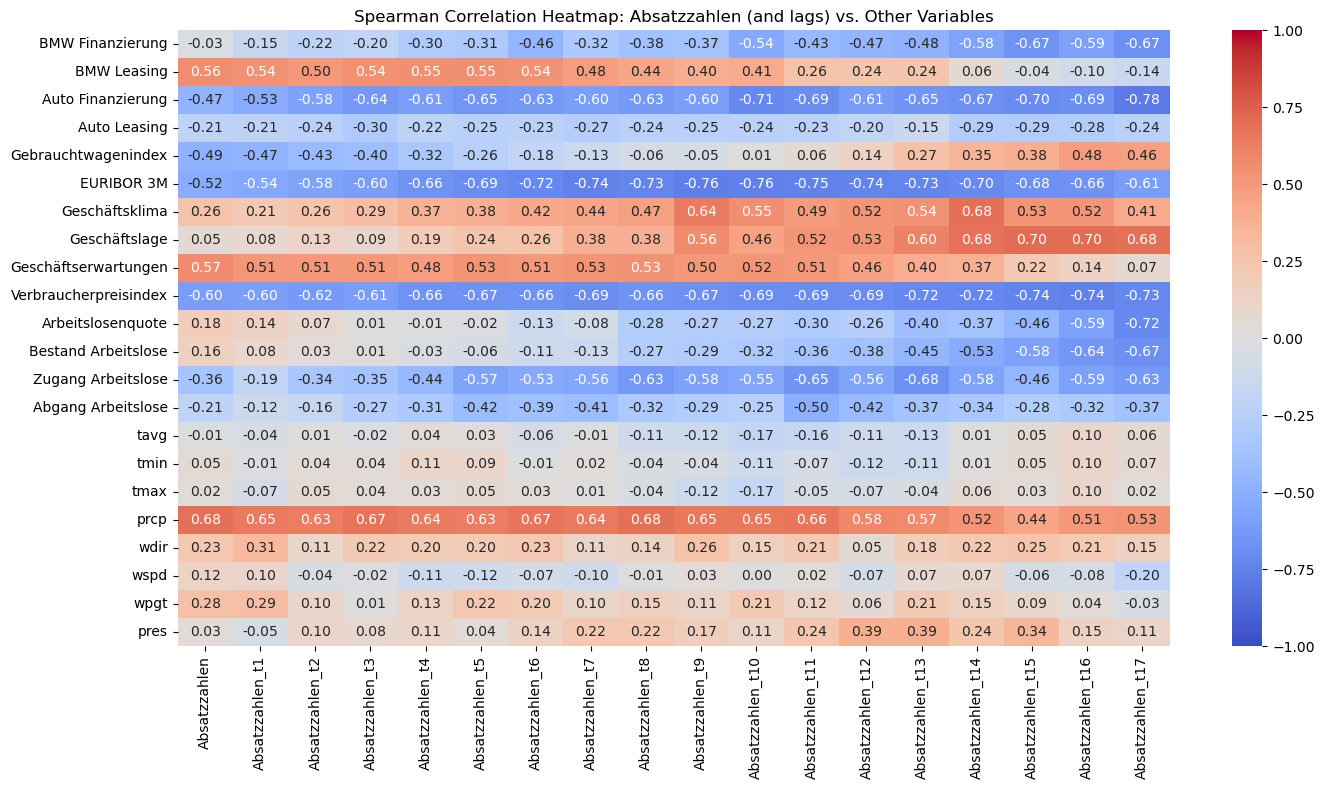


Spearman Correlation Subset:


,Absatzzahlen,Absatzzahlen_t1,Absatzzahlen_t2,Absatzzahlen_t3,Absatzzahlen_t4,Absatzzahlen_t5,Absatzzahlen_t6,Absatzzahlen_t7,Absatzzahlen_t8,Absatzzahlen_t9,Absatzzahlen_t10,Absatzzahlen_t11,Absatzzahlen_t12,Absatzzahlen_t13,Absatzzahlen_t14,Absatzzahlen_t15,Absatzzahlen_t16,Absatzzahlen_t17
BMW Finanzierung,-0.026507,-0.151899,-0.220031,-0.199767,-0.298223,-0.310678,-0.459348,-0.317852,-0.379493,-0.367421,-0.537191,-0.432143,-0.465805,-0.479070,-0.577675,-0.666008,-0.593658,-0.672455
BMW Leasing,0.555432,0.538282,0.504876,0.543039,0.552563,0.553030,0.537488,0.477262,0.441731,0.396561,0.409748,0.262857,0.242293,0.243640,0.060993,-0.041238,-0.096688,-0.135760
Auto Finanzierung,-0.470575,-0.525248,-0.582762,-0.636635,-0.607587,-0.647908,-0.629579,-0.597162,-0.631264,-0.597014,-0.714862,-0.690204,-0.612571,-0.649630,-0.672895,-0.697892,-0.686117,-0.782392
Auto Leasing,-0.205946,-0.214845,-0.237257,-0.303150,-0.218660,-0.247835,-0.234153,-0.270198,-0.244600,-0.247421,-0.240528,-0.233163,-0.201693,-0.147317,-0.285230,-0.286957,-0.281184,-0.244941
Gebrauchtwagenindex,-0.492053,-0.471974,-0.426400,-0.403902,-0.320323,-0.256656,-0.182861,-0.131038,-0.063268,-0.053761,0.011478,0.061537,0.136576,0.267376,0.351015,0.384240,0.477164,0.463978
EURIBOR 3M,-0.519255,-0.544185,-0.575318,-0.602670,-0.658920,-0.688167,-0.718391,-0.743509,-0.729958,-0.758281,-0.755390,-0.746531,-0.735779,-0.731614,-0.704841,-0.677075,-0.656660,-0.608275
Geschäftsklima,0.261517,0.212157,0.256206,0.291677,0.373274,0.382468,0.418029,0.440090,0.468112,0.636109,0.547467,0.487959,0.516826,0.537118,0.682640,0.529381,0.519521,0.409997
Geschäftslage,0.048847,0.082466,0.128118,0.091976,0.193028,0.242208,0.262131,0.380423,0.381969,0.563167,0.455174,0.522449,0.530069,0.604648,0.677829,0.697497,0.700211,0.683026
Geschäftserwartungen,0.565879,0.508942,0.506106,0.507713,0.478811,0.528427,0.505241,0.527818,0.531290,0.503529,0.522017,0.507143,0.457555,0.397664,0.372186,0.218050,0.140381,0.065237
Verbraucherpreisindex,-0.603779,-0.599708,-0.617829,-0.608115,-0.663021,-0.670707,-0.663732,-0.688679,-0.658328,-0.672579,-0.693349,-0.691735,-0.688884,-0.716119,-0.724206,-0.741502,-0.743058,-0.726367


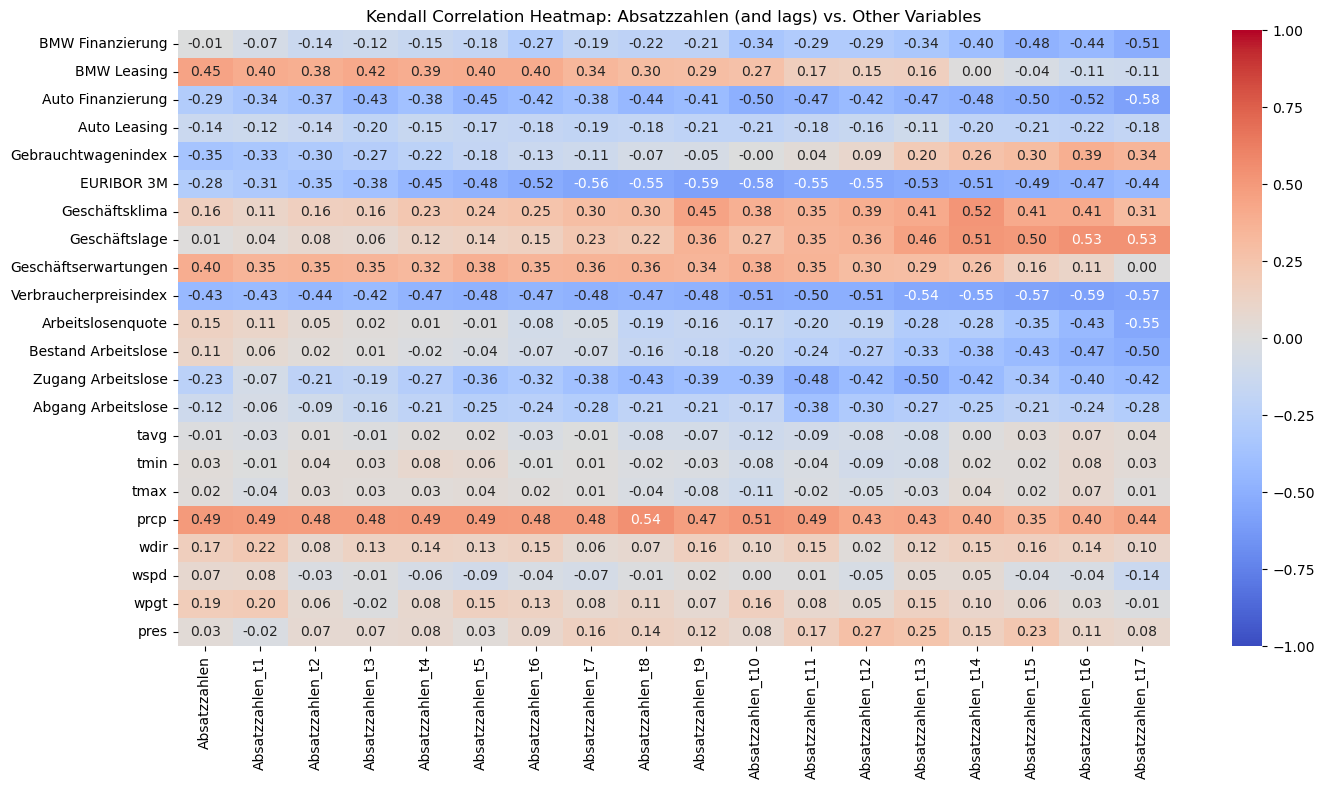


Kendall Correlation Subset:


,Absatzzahlen,Absatzzahlen_t1,Absatzzahlen_t2,Absatzzahlen_t3,Absatzzahlen_t4,Absatzzahlen_t5,Absatzzahlen_t6,Absatzzahlen_t7,Absatzzahlen_t8,Absatzzahlen_t9,Absatzzahlen_t10,Absatzzahlen_t11,Absatzzahlen_t12,Absatzzahlen_t13,Absatzzahlen_t14,Absatzzahlen_t15,Absatzzahlen_t16,Absatzzahlen_t17
BMW Finanzierung,-0.005650,-0.066043,-0.138536,-0.121554,-0.153247,-0.182492,-0.274633,-0.193033,-0.218703,-0.210980,-0.340408,-0.290816,-0.294326,-0.335800,-0.395169,-0.482828,-0.437632,-0.514950
BMW Leasing,0.447458,0.402688,0.382940,0.421053,0.394805,0.399327,0.400419,0.338171,0.300151,0.292549,0.268571,0.170068,0.154255,0.163737,0.002899,-0.042424,-0.107822,-0.111849
Auto Finanzierung,-0.285876,-0.339568,-0.374471,-0.434837,-0.381818,-0.449158,-0.421384,-0.380261,-0.443439,-0.414902,-0.497143,-0.469388,-0.421986,-0.467160,-0.482126,-0.503030,-0.522199,-0.581395
Auto Leasing,-0.136723,-0.119813,-0.140956,-0.199248,-0.150649,-0.167677,-0.178197,-0.190131,-0.182504,-0.206275,-0.208163,-0.176871,-0.156028,-0.108233,-0.203865,-0.206061,-0.215645,-0.182724
Gebrauchtwagenindex,-0.353407,-0.334601,-0.300333,-0.270304,-0.221645,-0.179306,-0.132914,-0.109699,-0.065685,-0.054967,-0.003269,0.036611,0.087883,0.200093,0.261248,0.298432,0.386448,0.343872
EURIBOR 3M,-0.275706,-0.309176,-0.346642,-0.378446,-0.445455,-0.477441,-0.517820,-0.558781,-0.550528,-0.585882,-0.578776,-0.554422,-0.551418,-0.530065,-0.507246,-0.490909,-0.469345,-0.435216
Geschäftsklima,0.159322,0.112800,0.162734,0.164160,0.232468,0.239057,0.250874,0.296081,0.300151,0.450980,0.379592,0.353741,0.390071,0.411656,0.522705,0.408081,0.410148,0.311185
Geschäftslage,0.014689,0.039158,0.076830,0.063910,0.124675,0.136700,0.150245,0.232221,0.218703,0.364706,0.273469,0.348639,0.361702,0.459759,0.511111,0.498990,0.532770,0.532669
Geschäftserwartungen,0.396610,0.351257,0.352692,0.347118,0.324675,0.375084,0.347310,0.358491,0.360483,0.344314,0.376327,0.353741,0.301418,0.289547,0.263768,0.159596,0.112051,0.003322
Verbraucherpreisindex,-0.433898,-0.426067,-0.439806,-0.424812,-0.468831,-0.477441,-0.466108,-0.478955,-0.470588,-0.483922,-0.513469,-0.503401,-0.505319,-0.543016,-0.547826,-0.571717,-0.585624,-0.565891


In [30]:
# modeling

# correlation
# Define target columns (Absatzzahlen and its lags)
target_cols = ['Absatzzahlen'] + [f'Absatzzahlen_t{i}' for i in range(1, 18)]

# Define other columns (all columns except DATE and target_cols)
other_cols = [col for col in df_fe.columns if col not in target_cols + ['DATE']]

correlation_methods = ['pearson', 'spearman', 'kendall']

for method in correlation_methods:
    # Calculate the correlation matrix between target_cols and other_cols
    correlation_matrix = df_fe[target_cols + other_cols].corr(method=method)

    # Select the relevant part of the correlation matrix
    # This shows the correlation of each 'other_col' with each 'target_col'
    correlation_subset = correlation_matrix.loc[other_cols, target_cols]

    # Plot the heatmap
    plt.figure(figsize=(16, 8))
    sns.heatmap(correlation_subset, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
    plt.title(f'{method.capitalize()} Correlation Heatmap: Absatzzahlen (and lags) vs. Other Variables')
    plt.show()

    print(f"\n{method.capitalize()} Correlation Subset:")
    display(correlation_subset)

In [ ]:
# indexing
df_sa["DATE"] = pd.to_datetime(df_sa["DATE"])
df_sa = df_sa.set_index("DATE")

columns_to_index = [
    "Absatzzahlen",
    "BMW Finanzierung",
    "BMW Leasing",
    "Auto Finanzierung",
    "Auto Leasing",
    "Gebrauchtwagenindex",
    "Geschäftsklima",
    "Geschäftslage",
    "Geschäftserwartungen",
    "Verbraucherpreisindex",
    "Arbeitslosenquote",
    "Bestand Arbeitslose",
    "Zugang Arbeitslose",
    "Abgang Arbeitslose",
]

In [ ]:
# plotting